In [2]:
# do all the imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

2022-12-28 13:23:55.146551: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [45]:
dataset = pd.read_csv('student-mat.csv')
dataset.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [46]:
dataset.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [47]:
# get the number of NAN
dataset.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [48]:
# check if any column is categorical
dataset["internet"]

0       no
1      yes
2      yes
3      yes
4       no
      ... 
390     no
391    yes
392     no
393    yes
394    yes
Name: internet, Length: 395, dtype: object

/var/folders/5f/0scd_l_d7qb2kc4_189596f40000gn/T/ipykernel_13778/4166431047.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


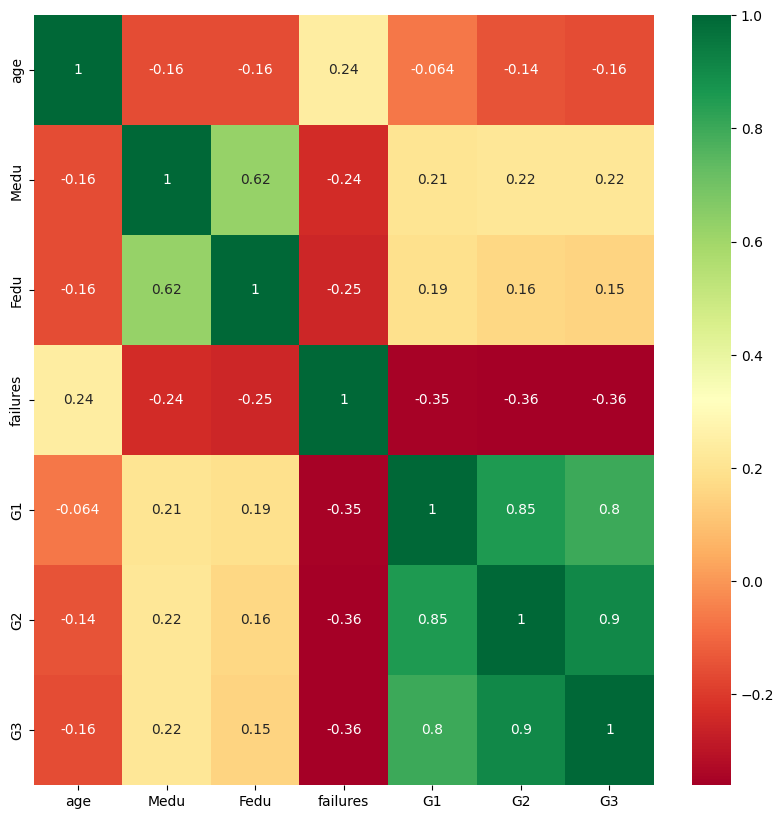

In [49]:
# see the correlation between the features
import seaborn as sns
# take only the top correlated features
corr = dataset.corr()
top_features = corr.index[abs(corr['G3']) > 0.15]
plt.figure(figsize=(10,10))
g = sns.heatmap(dataset[top_features].corr(),annot=True,cmap="RdYlGn")

 Grades in Midterm 1, Midterm 2 are great indicators of final grade
 
 Interstingly, father's education and mother's education are highly correlated with the final grade

In [7]:
# convert the categorical columns to numerical
columns = [x for x in dataset.columns if dataset[x].dtype == 'object']
columns

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [8]:
# getting categorical columns where unique values are more than two (yes/no)
[x for x in dataset.columns if dataset[x].unique().size > 2 and dataset[x].dtype == 'object']

['Mjob', 'Fjob', 'reason', 'guardian']

In [9]:
dataset['guardian'].unique()

array(['mother', 'father', 'other'], dtype=object)

In [10]:
# we can use one hot encoding for these columns
dataset = pd.get_dummies(dataset, columns)


In [11]:
dataset.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


In [12]:
# standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# drop the target column
y = dataset['G3']
X = dataset.drop('G3', axis=1)

# fit the scaler to the data
scaler.fit(X)

# transform the data
X = scaler.transform(X)


In [13]:
# split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# creating the model

model = keras.Sequential(
    [
        keras.layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1)
    ]
)

2022-12-28 13:24:09.354944: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['mean_absolute_error']
)

In [16]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 4ms/step - loss: 9.8580 - mean_absolute_error: 9.8580
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 8.3457 - mean_absolute_error: 8.3457
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 5.7975 - mean_absolute_error: 5.7975
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 3.3054 - mean_absolute_error: 3.3054
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 2.7888 - mean_absolute_error: 2.7888
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 2.1464 - mean_absolute_error: 2.1464
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 1.8286 - mean_absolute_error: 1.8286
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 1.5631 - mean_absolute_error: 1.5631
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 1.3835 - mean_absolute_error: 1.3835
Epoch 10/1

In [17]:
for x in range(10):
    print(f"Predicted: {model.predict(X_test[x].reshape(1, -1))} Actual: {y_test.iloc[x]}")

1/1 [==============================] - 0s 122ms/step
Predicted: [[3.164339]] Actual: 10
1/1 [==============================] - 0s 32ms/step
Predicted: [[13.6340885]] Actual: 12
1/1 [==============================] - 0s 28ms/step
Predicted: [[0.55809927]] Actual: 5
1/1 [==============================] - 0s 29ms/step
Predicted: [[11.0104065]] Actual: 10
1/1 [==============================] - 0s 31ms/step
Predicted: [[10.307433]] Actual: 9
1/1 [==============================] - 0s 31ms/step
Predicted: [[11.798219]] Actual: 13
1/1 [==============================] - 0s 30ms/step
Predicted: [[19.175009]] Actual: 18
1/1 [==============================] - 0s 27ms/step
Predicted: [[7.879081]] Actual: 6
1/1 [==============================] - 0s 31ms/step
Predicted: [[5.566782]] Actual: 0
1/1 [==============================] - 0s 28ms/step
Predicted: [[9.687647]] Actual: 14


In [18]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 3ms/step - loss: 1.9776 - mean_absolute_error: 1.9776


[1.977623462677002, 1.977623462677002]

In [26]:
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
model.score(X_test, y_test)
# get the MAE
sklearn.metrics.mean_absolute_error(y_test, model.predict(X_test))

1.6475359869774975

In [28]:
for x in range(10):
    print(f"Predicted: {model.predict(X_test[x].reshape(1, -1))} Actual: {y_test.iloc[x]}")

Predicted: [6.00661343] Actual: 10
Predicted: [11.52675503] Actual: 12
Predicted: [2.86855191] Actual: 5
Predicted: [8.79189175] Actual: 10
Predicted: [8.54323452] Actual: 9
Predicted: [11.89028042] Actual: 13
Predicted: [19.10121792] Actual: 18
Predicted: [7.17153042] Actual: 6
Predicted: [7.40834683] Actual: 0
Predicted: [12.3081271] Actual: 14


In [29]:
# tring Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [30]:
model.score(X_test, y_test)

# get the MAE
sklearn.metrics.mean_absolute_error(y_test, model.predict(X_test))

1.2051898734177215

In [31]:
for x in range(10):
    print(f"Predicted: {model.predict(X_test[x].reshape(1, -1))} Actual: {y_test.iloc[x]}")

Predicted: [8.3] Actual: 10
Predicted: [11.84] Actual: 12
Predicted: [6.73] Actual: 5
Predicted: [9.87] Actual: 10
Predicted: [8.9] Actual: 9
Predicted: [12.87] Actual: 13
Predicted: [18.63] Actual: 18
Predicted: [6.99] Actual: 6
Predicted: [7.04] Actual: 0
Predicted: [13.24] Actual: 14


In [32]:
# transforming the data into classes -> Letter Grades

def get_letter_grade(grade):
    grade = int(grade) * 100 / 20
    if grade >= 94:
        return 'A'
    elif grade >= 90:
        return 'A-'
    elif grade >= 87:
        return 'B+'
    elif grade >= 84:
        return 'B'
    elif grade >= 80:
        return 'B-'
    elif grade >= 77:
        return 'C+'
    elif grade >= 74:
        return 'C'
    elif grade >= 70:
        return 'C-'
    elif grade >= 67:
        return 'D+'
    elif grade >= 64:
        return 'D'
    elif grade >= 60:
        return 'D-'
    else:
        return 'F'

In [33]:
for x in range(10,20):
    print(f"Predicted: {get_letter_grade(model.predict(X_test[x].reshape(1, -1)))} Actual: {get_letter_grade(y_test.iloc[x])}")

Predicted: C Actual: C
Predicted: F Actual: F
Predicted: C- Actual: C
Predicted: F Actual: F
Predicted: C- Actual: C-
Predicted: F Actual: F
Predicted: F Actual: F
Predicted: F Actual: F
Predicted: C Actual: C
Predicted: F Actual: F


In [34]:
# get the accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score([get_letter_grade(x) for x in y_test], [get_letter_grade(x) for x in model.predict(X_test)])
print(f"Accuracy: {acc * 100}%")

Accuracy: 67.08860759493672%


In [35]:
# save the model
import pickle
pickle.dump(model, open('model.pkl', 'wb'))